Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

Load Dataset

In [4]:
dataset_path = "/content/diabetes_cleaned.csv"
df = pd.read_csv(dataset_path)

#display sample
print("Dataset Sample:")
print(df.head())

# Check shape and class distribution
print("\nDataset Shape:",df.shape)
print("Class Distribution in Diabetes Binary:")
print(df['Diabetes_binary'].value_counts(normalize=True))

Dataset Sample:
   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0       1         1          1  40.0       1       0   
1                0       0         0          0  25.0       1       0   
2                0       1         1          1  28.0       0       0   
3                0       1         0          1  27.0       0       0   
4                0       1         1          1  24.0       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             0       0  ...              1   
1                     0             1       0  ...              0   
2                     0             0       1  ...              1   
3                     0             1       1  ...              1   
4                     0             1       1  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0            0      5.0      18.0      15.0        

Training Data

In [5]:
#define features and target ( binary classification :- Diabetes_binary 0 / 1 )
X = df.drop('Diabetes_binary',axis=1)
y = df['Diabetes_binary']

# Taking sample because dataset is large
df_sampled = df.sample(n=20000,random_state=42)
X = df_sampled.drop('Diabetes_binary',axis=1)
y = df_sampled['Diabetes_binary']

#train / test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

print("\nTrain Shape:",X_train.shape)
print("Test Shape:",X_test.shape)


Train Shape: (16000, 21)
Test Shape: (4000, 21)


Decision Tree with Entropy and Information Gain

Unpruned Tree Accuracy: 0.768
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      3369
           1       0.29      0.33      0.31       631

    accuracy                           0.77      4000
   macro avg       0.58      0.59      0.59      4000
weighted avg       0.78      0.77      0.77      4000



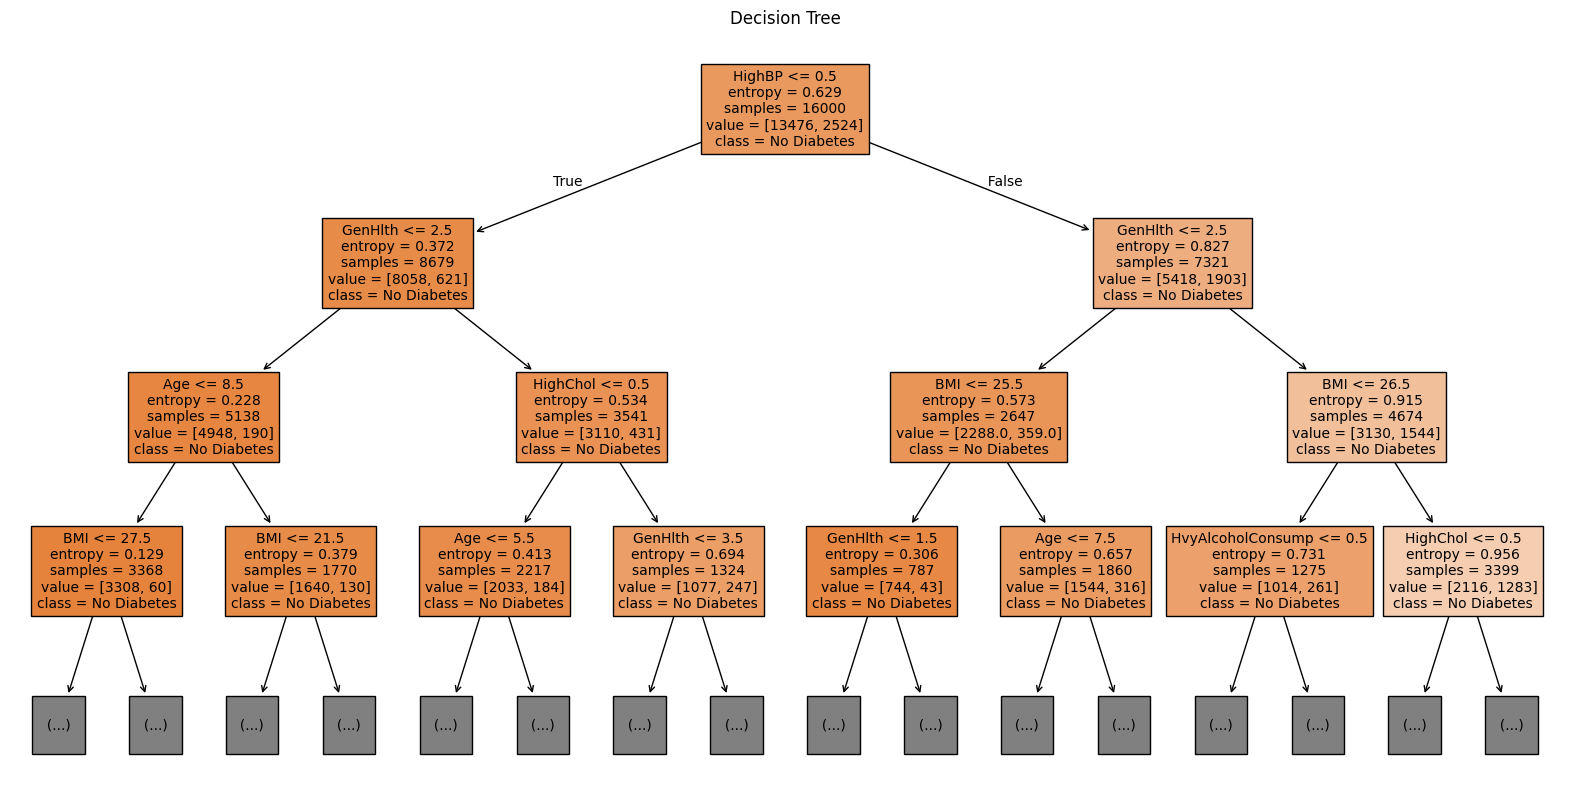

Train Acc ( overfit indicator ) :  0.999375 | Test Acc: 0.768


In [6]:
tree = DecisionTreeClassifier(criterion='entropy',random_state=42)
tree.fit(X_train,y_train)

y_pred_tree = tree.predict(X_test)
acc_tree = accuracy_score(y_test,y_pred_tree)
print("Unpruned Tree Accuracy:",acc_tree)
print("Classification Report:\n",classification_report(y_test, y_pred_tree))

#visualize tree ( truncating depth otherwise real tree is more deeper )
plt.figure(figsize=(20,10))
plot_tree(tree,max_depth=3,feature_names=X.columns,class_names=['No Diabetes','Diabetes'],filled=True,fontsize=10)
plt.title("Decision Tree")
plt.show()

#demonstrate overfitting :- Train acc vs Test acc
train_acc = accuracy_score(y_train,tree.predict(X_train))
print("Train Acc ( overfit indicator ) : ",train_acc,"| Test Acc:",acc_tree)

Avoiding Overfitting with Params ( Max Depth, Min Samples )

Pruned Tree Accuracy: 0.84425
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.96      0.91      3369
           1       0.52      0.20      0.29       631

    accuracy                           0.84      4000
   macro avg       0.69      0.58      0.60      4000
weighted avg       0.81      0.84      0.81      4000



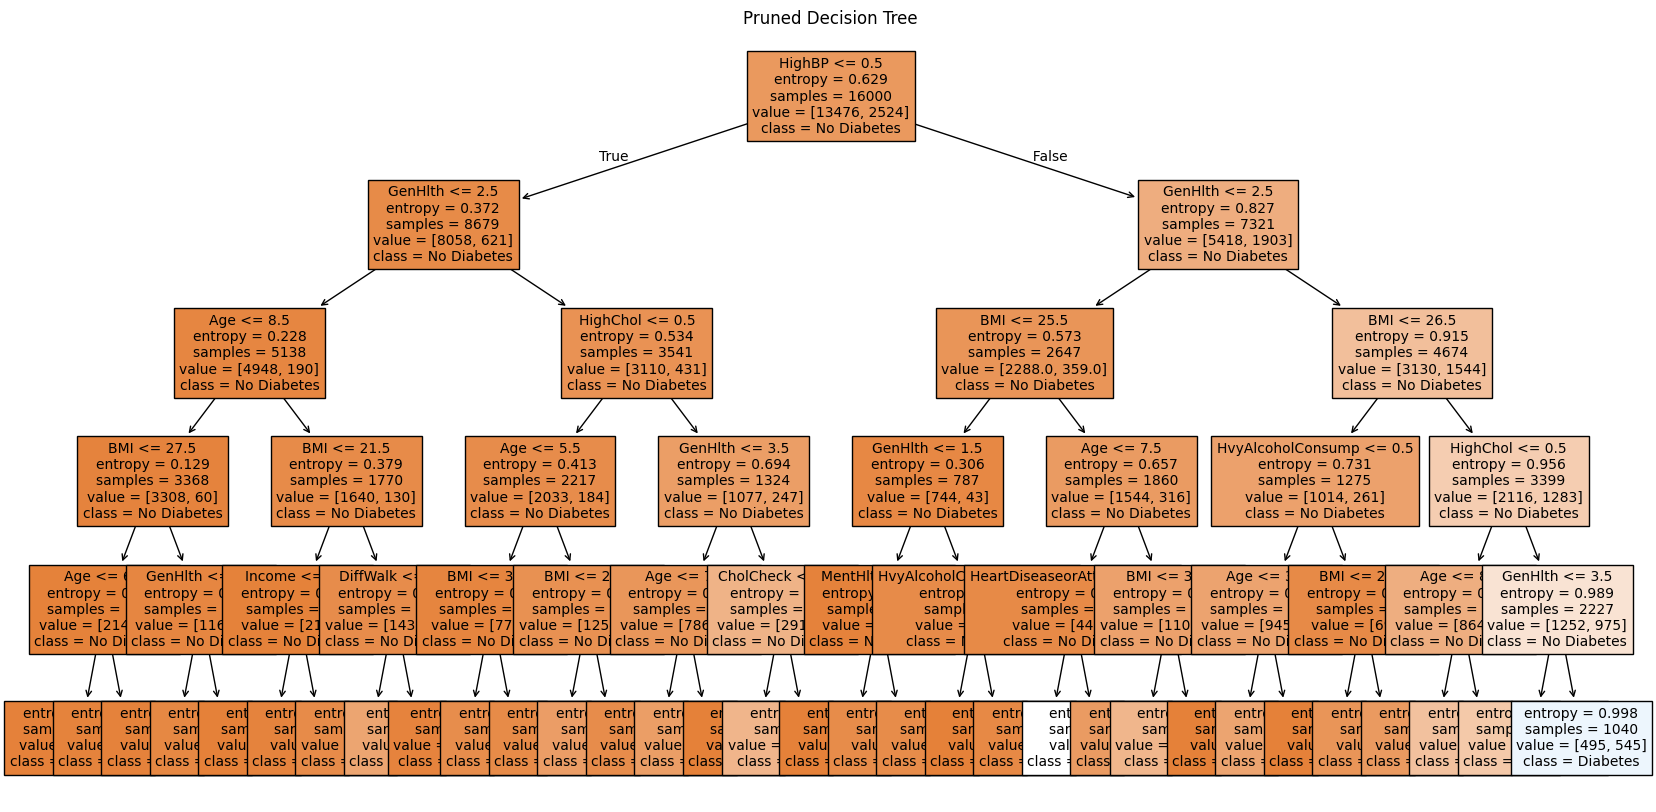

Pruned Train Accuracy: 0.845375 | Test Acc: 0.84425


In [7]:
tree_pruned = DecisionTreeClassifier(criterion='entropy',
                                     max_depth=5,
                                     min_samples_leaf=10,
                                     min_samples_split=20,
                                     random_state=42)
tree_pruned.fit(X_train,y_train)

y_pred_pruned = tree_pruned.predict(X_test)
acc_pruned = accuracy_score(y_test,y_pred_pruned)
print("Pruned Tree Accuracy:",acc_pruned)
print("Classification Report:",classification_report(y_test,y_pred_pruned))

#Vizulaization of Pruned Tree
plt.figure(figsize=(20,10))
plot_tree(tree_pruned,feature_names=X.columns,
          class_names=['No Diabetes','Diabetes'],
          filled=True,fontsize=10)

plt.title("Pruned Decision Tree")
plt.show()

train_acc_pruned = accuracy_score(y_train,tree_pruned.predict(X_train))

print("Pruned Train Accuracy:",train_acc_pruned,"| Test Acc:",acc_pruned)

Random Forest ( Bagging, Feature Randomization )

Random Forest Accuracy: 0.84225
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      3369
           1       0.00      0.00      0.00       631

    accuracy                           0.84      4000
   macro avg       0.42      0.50      0.46      4000
weighted avg       0.71      0.84      0.77      4000

OOB Score ( Internal Validation ): 0.842375

Feature Importances:
 HighBP                  0.240069
GenHlth                 0.189230
BMI                     0.136668
HighChol                0.113539
Age                     0.105192
DiffWalk                0.074726
HeartDiseaseorAttack    0.039119
PhysHlth                0.025369
Income                  0.021765
Education               0.010302
PhysActivity            0.009550
HvyAlcoholConsump       0.009516
CholCheck               0.008285
MentHlth                0.004362
Stroke                  0.003135
Sex                     0.002572
AnyHealthcare         

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


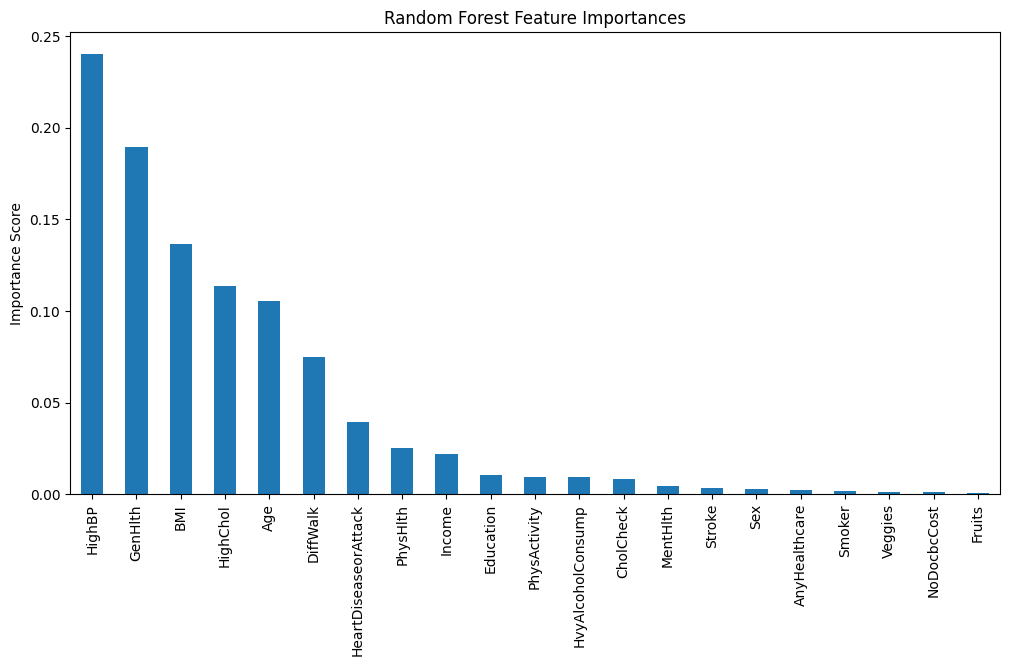

RF Train Acc: 0.8423125 | Test Acc: 0.84225


In [8]:
rf =RandomForestClassifier(n_estimators=100,
                           criterion='entropy',
                           max_depth=5,
                           min_samples_leaf=10,
                           max_features='sqrt',
                           random_state=42,
                           oob_score=True)

rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
print("Random Forest Accuracy:",acc_rf)
print("Classification Report:\n",classification_report(y_test,y_pred_rf))
print("OOB Score ( Internal Validation ):",rf.oob_score_)

#feature importances
importances = rf.feature_importances_
feat_imp =pd.Series(importances,index=X.columns).sort_values(ascending=False)
print("\nFeature Importances:\n",feat_imp)

#plotting importances
feat_imp.plot(kind='bar',figsize=(12,6))
plt.title("Random Forest Feature Importances")
plt.ylabel("Importance Score")
plt.show()

# Compare :- RF vs Tree
train_acc_rf=accuracy_score(y_train,rf.predict(X_train))
print("RF Train Acc:",train_acc_rf,"| Test Acc:",acc_rf)

## Findings

- Decision trees figure out where to split the data using measures like information gain ( based on entropy ). In this case they often split on features like BMI or general health to predict diabetes.

- When the tree isnot pruned it becomes very complex and starts to memorize the training data picking up on random details like specific mental health values. This leads to overfitting.

- By pruning the tree ( for example: setting max_depth=5 and min_samples_leaf=10) we make it simpler. This helps the model focus on the bigger patterns and improves how well it performs on new data.

- A Random Forest builds many different decision trees using random samples and features then combines their results. This helps smooth out the noise from any single tree and makes the predictions more reliable.

- For classification the forest makes its final decision by majority vote whichever class most trees agree on wins.

- Looking at feature importance shows that factors like BMI, age and high blood pressure play the biggest role in predicting diabetes.

- Overall the Random Forest model usually gives better accuracy and is more robust than a single decision tree on this diabetes dataset.
